In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
columns = ["devBLEU", "BLEU", "AL","AL-CA","AP","AP-CA","DAL","DAL-CA"]
formal = [
    "dev BLEU", "BLEU score", 
    "Average Lagging", "Computation Aware Average Lagging",
    "Average Proportion", "Computation Aware Average Proportion",
    "Differentiable Average Lagging", "Computation Aware Differentiable Average Lagging",
]
data = {
    "wait-1": [19.44,19.51,2.04,20.95,0.63,8.05,3.28,106.07],
    "wait-3": [25.37,25.65,3.31,26.77,0.7,8.33,4.51,110.7],
    "wait-5": [27.9,28.28,4.58,32.46,0.76,8.46,5.72,112.9],
    "wait-7": [29.39,29.72,5.78,38.71,0.81,8.74,6.89,116.55],
    "wait-9": [30.33,30.55,6.92,44.5,0.85,8.95,7.97,120.13],
    "sinkhorn-1": [20.31,20.32,2.23,14.95,0.63,4.82,2.95,63.52],
    "sinkhorn-3": [25.24,25.28,3.69,17.56,0.71,5.56,4.44,74.11],
    "sinkhorn-5": [26.68,26.97,4.8,19.08,0.77,5.78,5.78,77.62],
    "sinkhorn-7": [27.67,28,6.04,20.67,0.81,5.9,6.98,79.49],
    "sinkhorn-9": [28.15,28.53,7.13,21.99,0.85,6,8.08,81.36],
}

In [3]:
BLEU_waitk = [ data[f"wait-{k}"][columns.index("BLEU")] for k in range(1, 10, 2) ]
BLEU_sinkhorn = [ data[f"sinkhorn-{k}"][columns.index("BLEU")] for k in range(1, 10, 2) ]



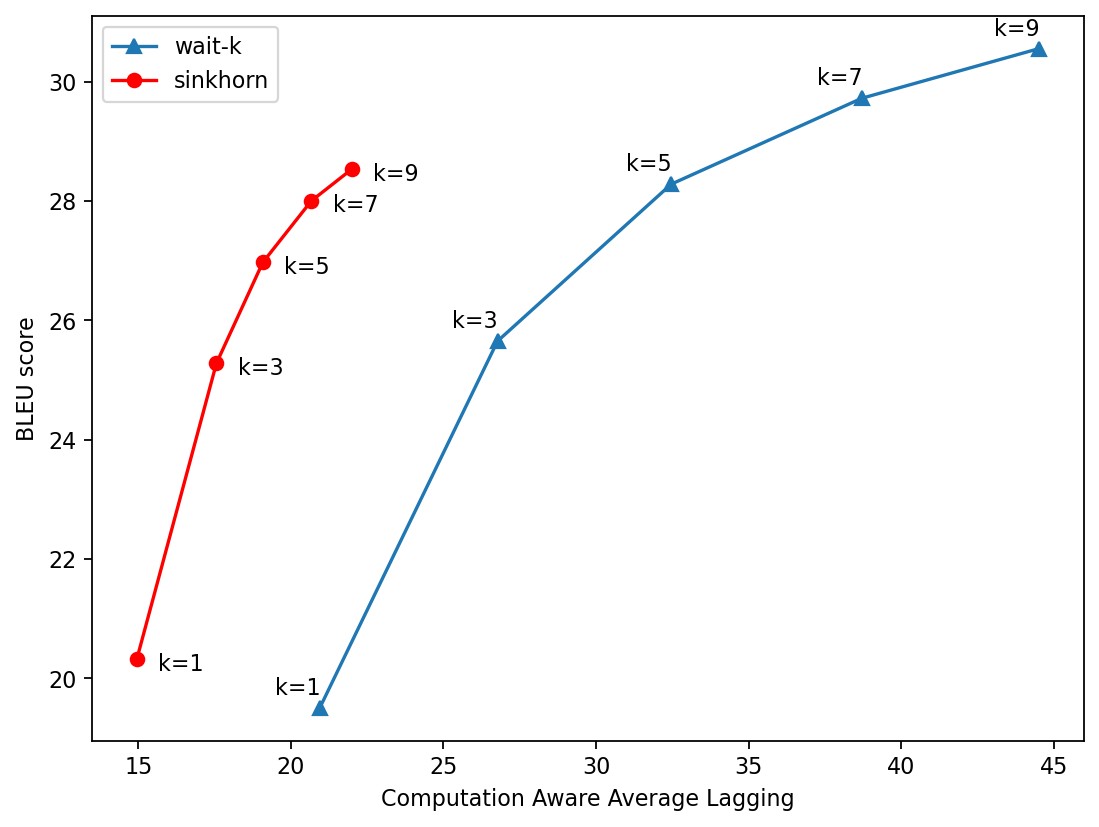

In [24]:
def plot_latency(
    latency="AL",
    figsize=(8, 6),
    dpi=160,
    offset_waitk=(-10,6),
    offset_sinkhorn=(20,-5),    
):
    column_id = columns.index(latency)
    y_waitk = BLEU_waitk
    y_sinkhorn = BLEU_sinkhorn
    x_waitk = [ data[f"wait-{k}"][column_id] for k in range(1, 10, 2) ]
    x_sinkhorn = [ data[f"sinkhorn-{k}"][column_id] for k in range(1, 10, 2) ]
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111)
    ax.plot(x_waitk, y_waitk, "^-", label="wait-k")
    ax.plot(x_sinkhorn, y_sinkhorn, "ro-", label="sinkhorn")
    ax.legend()

    # annotate wait-k
    for i, (x,y) in enumerate(zip(x_waitk, y_waitk)):
        ax.annotate(f"k={2*i+1}",
                 (x,y),
                 textcoords="offset points",
                 xytext=offset_waitk,
                 ha='center')

    # annotate sinkhorn
    for i, (x,y) in enumerate(zip(x_sinkhorn, y_sinkhorn)):
        ax.annotate(f"k={2*i+1}",
                 (x,y),
                 textcoords="offset points",
                 xytext=offset_sinkhorn,
                 ha='center')

    ax.autoscale()

    ax.set_xlabel(formal[column_id])
    ax.set_ylabel("BLEU score")
    fig.show()

plot_latency(
    latency="AL-CA",
)